In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
import mysql.connector as mysqlConnector
import sqlite3
import pandas as pd

In [3]:
df=pd.read_csv('C:/Users/jorda/Dropbox/Simplon/Programmation/SQL/Projet Foody/data/produit.csv')
df[:10]

,RefProd,NomProd,NoFour,CodeCateg,QteParUnit,PrixUnit,UnitesStock,UnitesCom,NiveauReap,Indisponible
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
5,6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25.00,120,0,25,0
6,7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30.00,15,0,10,0
7,8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40.00,6,0,0,0
8,9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.00,29,0,0,1
9,10,Ikura,4,8,12 - 200 ml jars,31.00,31,0,0,0


In [4]:
conn = mysqlConnector.connect(host='Localhost',user='root',passwd='jesuis95*', database='foody')
if conn:
    print("Connection Successful!")
else:
    print("Connection Failed!")

Connection Successful!


In [5]:
# Connect to the Sakila database(downloaded from links up)
con = sqlite3.connect("sakila.db")
if con:
    print("Connection Successful!")
else:
    print("Connection Failed!")
cur = con.cursor()

Connection Successful!


# Shipper qui effectue le plus de commandes

In [35]:
# Set SQL query as a comment
sql_query = ''' SELECT NomMess AS Shipper, COUNT(Port) AS Quantité FROM Commande INNER JOIN Messager ON Messager.NoMess = Commande.NoMess GROUP BY NomMess'''

# Use pandas to pass sql query using connection form SQLite3
df_ship = pd.read_sql(sql_query, conn)

# Show the resulting DataFrame
df_ship

,Shipper,Quantité
0,Speedy Express,249
1,United Package,326
2,Federal Shipping,255


<AxesSubplot:xlabel='Shipper'>

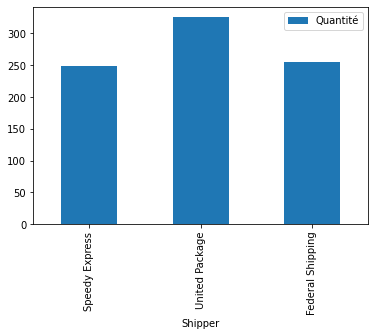

In [7]:
df_ship.plot(kind='bar')

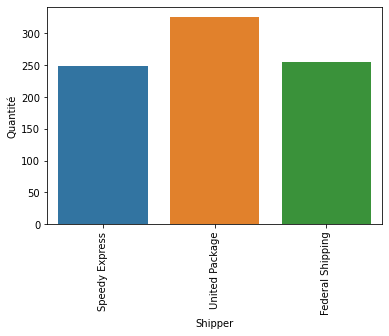

In [38]:
sns.barplot(x='Shipper', y='Quantité', data=df_ship)
plt.xticks(rotation=90)
plt.show()


# Pays des entreprises qui importent le plus

In [46]:
# Set SQL query as a comment
# Pays des entreprises qui importent le plus
sql_query = "SELECT SUM(Qte) AS Quantité, PaysLiv AS 'Pays de livraison' FROM DetailCommande INNER JOIN Commande ON DetailCommande.Nocom = Commande.Nocom INNER JOIN Produit ON DetailCommande.Refprod = Produit.Refprod INNER JOIN Catégorie ON Catégorie.CodeCateg = Produit.CodeCateg GROUP BY PaysLiv ORDER BY Quantité desc;"

# Use pandas to pass sql query using connection form SQLite3
df = pd.read_sql(sql_query, conn)

# Show the resulting DataFrame
df

,Quantité,Pays de livraison
0,4563.0,Germany
1,3867.0,USA
2,2287.0,Austria
3,1748.0,Brazil
4,1725.0,France
5,1420.0,Canada
6,1396.0,UK
7,1321.0,Venezuela
8,883.0,Ireland
9,840.0,Sweden


<AxesSubplot:title={'center':'Pays des entreprises qui importent le plus'}, xlabel='Pays de livraison'>

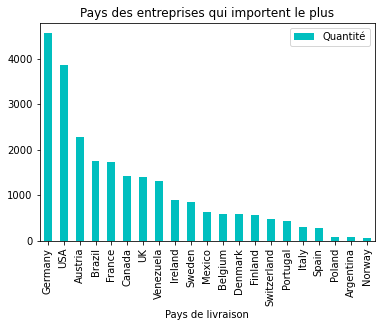

In [10]:
df.plot(kind='bar', title='Pays des entreprises qui importent le plus', color='c')

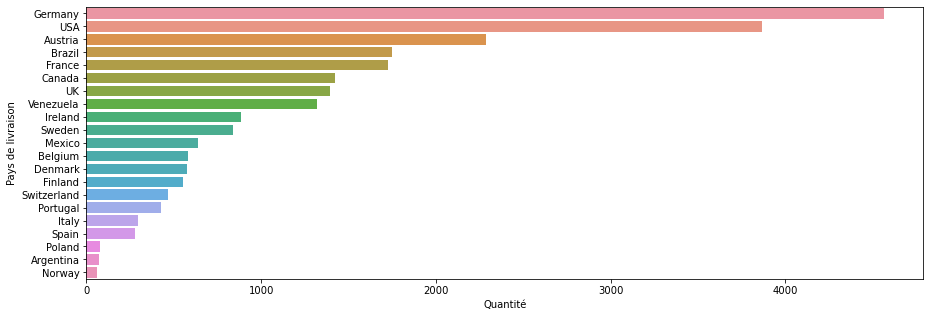

In [61]:
plt.figure(figsize=(15,5))
sns.barplot(y='Pays de livraison', x='Quantité', data=df)
plt.show()

# Origine du Chiffre d'affaire par pays

In [137]:
# Set SQL query as a comment
# Pays des entreprises qui importent le plus
sql_query_import = "SELECT SUM(PrixUnit*Qte) AS 'Chiffre d''affaire', PaysLiv FROM DetailCommande INNER JOIN Commande ON Commande.NoCom = Detailcommande.NoCom GROUP BY PaysLiv;"

# Use pandas to pass sql query using connection form SQLite3
df_import = pd.read_sql(sql_query_import, conn)

# Show the resulting DataFrame
df_import

,Chiffre d'affaire,PaysLiv
0,43531.30,France
1,105574.40,Germany
2,42030.38,Brazil
3,13759.90,Belgium
4,10677.50,Switzerland
5,26541.40,Venezuela
6,62363.90,Austria
7,17341.30,Mexico
8,110650.93,USA
9,19114.00,Sweden


<ipython-input-171-616a3c65656e>:2: MatplotlibDeprecationWarning: Support for passing a radius of None to mean 1 is deprecated since 3.3 and will be removed two minor releases later.
  plt.pie(x="Chiffre d'affaire", explode=None, labels='PaysLiv', colors=None, autopct=None, pctdistance=0.75, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, data=df_import)
<ipython-input-171-616a3c65656e>:2: MatplotlibDeprecationWarning: Support for passing a startangle of None to mean 0 is deprecated since 3.3 and will be removed two minor releases later.
  plt.pie(x="Chiffre d'affaire", explode=None, labels='PaysLiv', colors=None, autopct=None, pctdistance=0.75, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, data=df_import)


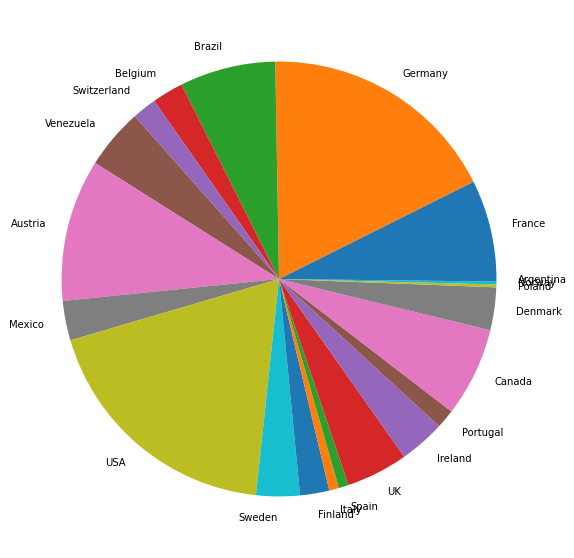

In [171]:
plt.figure(figsize=(10,10))
plt.pie(x="Chiffre d'affaire", explode=None, labels='PaysLiv', colors=None, autopct=None, pctdistance=0.75, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, data=df_import)
plt.show()

# Pays qui produit le plus

In [195]:
# Set SQL query as a comment
# Pays des entreprises qui importent le plus
sql_query_production = "SELECT SUM(Qte) AS Quantité, Fournisseur.Pays FROM DetailCommande, Produit, Fournisseur WHERE (Produit.Refprod = DetailCommande.Refprod AND Produit.NoFour = Fournisseur.NoFour) GROUP BY Fournisseur.Pays ORDER BY Quantité DESC;"


#"SELECT Pays FROM Fournisseur GROUP BY Pays;"

# Use pandas to pass sql query using connection form SQLite3
df_production = pd.read_sql(sql_query_production, conn)

# Show the resulting DataFrame
df_production

,Quantité,Pays
0,3055.0,USA
1,2887.0,Australia
2,2782.0,Germany
3,2367.0,France
4,2302.0,Italy
5,2179.0,UK
6,1779.0,Canada
7,1275.0,Norway
8,1048.0,Sweden
9,1019.0,Japan


### Prochain objectif, utiliser Geoloc

# Pays des entreprises qui importent le plus par catégorie

In [11]:
# Pays des entreprises qui importent le plus par catégorie
sql_query_1 = "SELECT NomCateg AS Catégorie, SUM(Qte) AS Quantité, PaysLiv AS 'Pays de livraison' FROM DetailCommande INNER JOIN Commande ON DetailCommande.Nocom = Commande.Nocom INNER JOIN Produit ON DetailCommande.Refprod = Produit.Refprod INNER JOIN Catégorie ON Catégorie.CodeCateg = Produit.CodeCateg GROUP BY Catégorie.Nomcateg, PaysLiv ORDER BY Quantité desc;"
#ROUND(AVG(DetailCommande.PrixUnit)) AS Moyenne

# Use pandas to pass sql query using connection form SQLite3
df_1 = pd.read_sql(sql_query_1, conn, index_col=['Pays de livraison'])

# Show the resulting DataFrame
df_1

,Catégorie,Quantité
Pays de livraison,,
Germany,Dairy Products,1006.0
Germany,Desserts,779.0
Germany,drinks,710.0
USA,drinks,682.0
USA,Dairy Products,666.0
...,...,...
Denmark,Produce,10.0
Norway,Produce,6.0
Norway,Meat/Poultry,5.0


In [12]:
df_1 = df_1.groupby(['Pays de livraison', 'Catégorie'])['Quantité'].mean().unstack(level=-1)
df_1

Catégorie,Condiments,Dairy Products,Desserts,Grains/Cereals,Meat/Poultry,Produce,Seafood,drinks
Pays de livraison,,,,,,,,
Argentina,NaN,2.0,24.0,NaN,NaN,12.0,30.0,3.0
Austria,500.0,392.0,263.0,268.0,179.0,180.0,127.0,378.0
Belgium,60.0,160.0,111.0,65.0,54.0,58.0,NaN,74.0
Brazil,238.0,309.0,408.0,100.0,89.0,79.0,125.0,400.0
Canada,185.0,251.0,290.0,189.0,135.0,30.0,151.0,189.0
Denmark,90.0,71.0,121.0,NaN,86.0,10.0,52.0,146.0
Finland,25.0,191.0,44.0,74.0,90.0,30.0,40.0,59.0
France,117.0,256.0,316.0,162.0,172.0,134.0,293.0,275.0
Germany,446.0,1006.0,779.0,495.0,297.0,184.0,646.0,710.0


<AxesSubplot:title={'center':'Pays des entreprises qui importent le plus par catégorie'}, xlabel='Pays de livraison'>

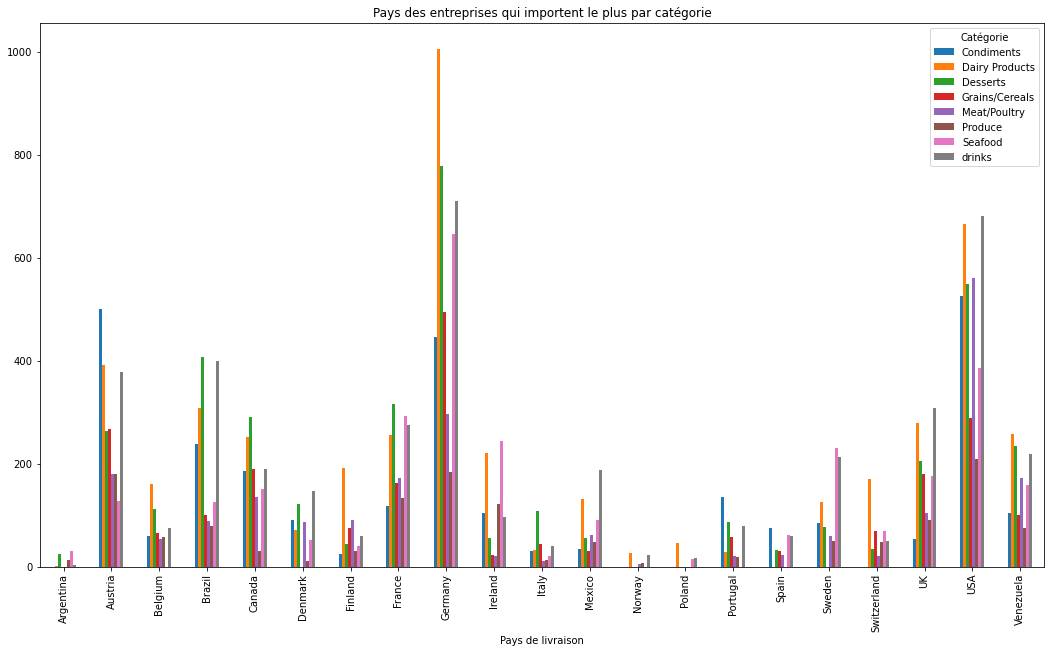

In [13]:
df_1.plot(figsize = (18 , 10), kind='bar', title='Pays des entreprises qui importent le plus par catégorie')

# Délai moyen en jour du Shipper par pays

In [14]:
# Délai moyen en jour du Shipper par pays
sql_query_2 = "SELECT NomMess, ROUND(AVG(DATEDIFF(AlivAvant, DateCom))) AS Délai, PaysLiv FROM Commande INNER JOIN Messager ON Messager.NoMess = Commande.NoMess GROUP BY PaysLiv, Commande.NoMess ;"

# Use pandas to pass sql query using connection form SQLite3
df_2 = pd.read_sql(sql_query_2, conn, index_col=['PaysLiv'])

# Show the resulting DataFrame
df_2

,NomMess,Délai
PaysLiv,,
Germany,Speedy Express,28.0
France,Speedy Express,28.0
Austria,Speedy Express,27.0
USA,Speedy Express,29.0
Finland,Speedy Express,30.0
...,...,...
Canada,Federal Shipping,27.0
Belgium,Federal Shipping,32.0
Italy,Federal Shipping,28.0


In [15]:
df_2 = df_2.groupby(['NomMess','PaysLiv'])['Délai'].mean().unstack(level=0)
df_2

NomMess,Federal Shipping,Speedy Express,United Package
PaysLiv,,,
Argentina,25.0,25.0,28.0
Austria,30.0,27.0,29.0
Belgium,32.0,28.0,28.0
Brazil,26.0,29.0,28.0
Canada,27.0,32.0,29.0
Denmark,24.0,30.0,25.0
Finland,28.0,30.0,31.0
France,27.0,28.0,28.0
Germany,27.0,28.0,28.0


Text(0.5, 1.0, 'Délai moyen du Shipper par pays')

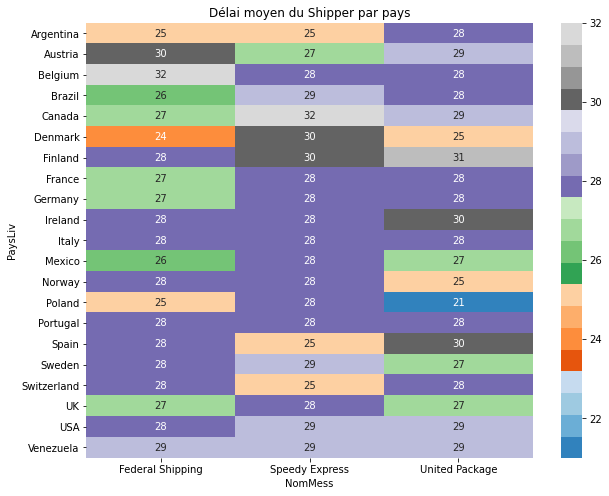

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df_2,cmap='tab20c',annot=True)
plt.title('Délai moyen du Shipper par pays')

#  Moyenne et Nombre de retard par Shipper

In [17]:
#Nombre de retard et moyenne par Shipper
sql_query_3 = "SELECT NomMess AS Shipper, COUNT(NomMess) AS 'Répétition', ROUND(AVG(DATEDIFF(DateEnv, AlivAvant))) AS 'Délai moyen' FROM Commande INNER JOIN Messager ON Messager.NoMess = Commande.NoMess WHERE CASE WHEN ALivAvant >= DateEnv THEN 'A l''heure' ELSE 'En Retard' END = 'En Retard' AND DateEnv IS NOT NULL GROUP BY Messager.NoMess ORDER BY 'Répétition' desc ;"

# Use pandas to pass sql query using connection form SQLite3
df_3 = pd.read_sql(sql_query_3, conn, index_col=['Shipper'])

# Show the resulting DataFrame
df_3

,Répétition,Délai moyen
Shipper,,
Speedy Express,12,8.0
United Package,16,6.0
Federal Shipping,9,6.0


<AxesSubplot:title={'center':'Nombre de retard et moyenne par Shipper'}, xlabel='Shipper'>

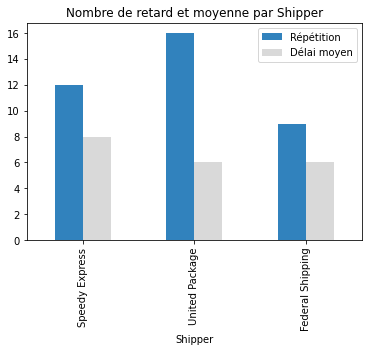

In [18]:
df_3.plot(kind='bar', cmap='tab20c', title = 'Nombre de retard et moyenne par Shipper')

<AxesSubplot:ylabel='Shipper'>

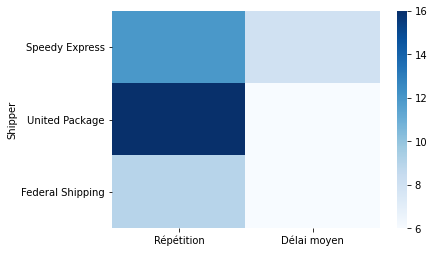

In [19]:
sns.heatmap(df_3, cmap='Blues')

# Moyenne des frais de port par Shipper

In [20]:
#Nombre de retard et moyenne par Shipper
sql_query_4 = "SELECT NomMess AS Shipper, AVG(Port) AS 'Port Moyen' FROM Commande INNER JOIN Messager ON Messager.NoMess = Commande.NoMess GROUP BY Commande.NoMess;"

# Use pandas to pass sql query using connection form SQLite3
df_4 = pd.read_sql(sql_query_4, conn, index_col=['Shipper'])

# Show the resulting DataFrame
df_4

,Port Moyen
Shipper,
Speedy Express,65.001325
United Package,86.640644
Federal Shipping,80.441216


<AxesSubplot:xlabel='Shipper'>

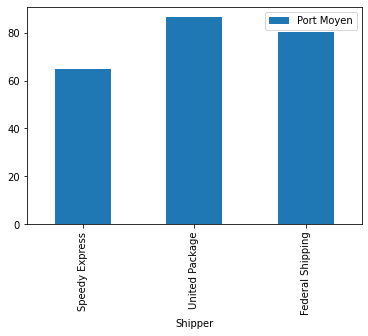

In [21]:
df_4.plot(kind='bar')